SETUP CELLS

In [1]:
# SETUP CELL

from google.colab import drive
drive.mount('/content/drive')


# setup vulkan
!mkdir -p /usr/share/vulkan/icd.d
!wget -q https://raw.githubusercontent.com/haosulab/ManiSkill/main/docker/nvidia_icd.json
!wget -q https://raw.githubusercontent.com/haosulab/ManiSkill/main/docker/10_nvidia.json
!mv nvidia_icd.json /usr/share/vulkan/icd.d
!mv 10_nvidia.json /usr/share/glvnd/egl_vendor.d/10_nvidia.json
!apt-get install -y --no-install-recommends libvulkan-dev
# !pip install --upgrade mani_skill tyro


# install dependencies
! apt-get install git-lfs
! git lfs install
! pip install --upgrade tyro

# install maniskill of my personal github repo
!git clone https://{}@github.com/szczekulskij/ManiSkill-Jan.git
!cd ManiSkill-Jan && git checkout add_new_env_1
!pip install --upgrade -e ManiSkill-Jan
# ! python -m mani_skill.utils.download_asset partnet_mobility_cabinet -y


try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    import site
    site.main() # run this so local pip installs are recognized


# ensure mani-skill is within the path
import sys
sys.path.append('/content/ManiSkill-Jan')
try :
  import mani_skill
except:
  raise Exception("Something wrong in this world (and particulary in your hacky setup idiot)")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libvulkan-dev is already the newest version (1.3.204.1-2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Git LFS initialized.
fatal: destination path 'ManiSkill-Jan' already exists and is not an empty directory.
Already on 'add_new_env_1'
Your branch is up to date with 'origin/add_new_env_1'.
Obtaining file:///content/ManiSkill-Jan
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Prepar

In [11]:
def re_load_env():
  # re-download the github repo
  !rm -rf ManiSkill-Jan
  !git clone https://{}@github.com/szczekulskij/ManiSkill-Jan.git
  !cd ManiSkill-Jan && git checkout add_new_env_1 && git fetch origin && git pull -f
  !pip uninstall -y mani_skill
  !pip install --upgrade -e ManiSkill-Jan

  try:
    import google.colab
    IN_COLAB = True
  except:
    IN_COLAB = False

  if IN_COLAB:
      import site
      site.main() # run this so local pip installs are recognized

  # re-load mani_skill import
  # import re-load
  import sys
  sys.path.append('/content/ManiSkill-Jan')
  import importlib
  try:
    importlib.reload(mani_skill)
    importlib.reload(mani_skill.envs)
  except:
    import mani_skill
    import mani_skill.envs


re_load_env()

Cloning into 'ManiSkill-Jan'...
remote: Enumerating objects: 3716, done.
remote: Counting objects: 100% (542/542), done.
remote: Compressing objects: 100% (333/333), done.
remote: Total 3716 (delta 334), reused 351 (delta 205), pack-reused 3174
Receiving objects: 100% (3716/3716), 290.76 MiB | 14.09 MiB/s, done.
Resolving deltas: 100% (1695/1695), done.
Updating files: 100% (744/744), done.
Branch 'add_new_env_1' set up to track remote branch 'add_new_env_1' from 'origin'.
Switched to a new branch 'add_new_env_1'
Already up to date.
Found existing installation: mani_skill 3.0.0b4
Uninstalling mani_skill-3.0.0b4:
  Successfully uninstalled mani_skill-3.0.0b4
Obtaining file:///content/ManiSkill-Jan
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for mani_skill (pyproje

In [1]:
# CPU
# import gymnasium as gym
# import mani_skill.envs
# import time
# env = gym.make("PullCubeWithHockeyStick-v1")
# obs, _ = env.reset(seed=0)
# env.unwrapped.print_sim_details() # print verbose details about the configuration
# done = False
# start_time = time.time()
# while not done:
#     obs, rew, terminated, truncated, info = env.step(env.action_space.sample())
#     done = terminated or truncated
# N = info["elapsed_steps"].item()
# dt = time.time() - start_time
# FPS = N / (dt)
# print(f"Frames Per Second = {N} / {dt} = {FPS}")



# GPU
### Make sure to restart the notebook if you already ran a CPU sim!! ###
# Import required packages
import gymnasium as gym
import mani_skill.envs
import torch
import time
num_envs = 2048//4 # you can go up to 4096 on better GPUs
env = gym.make("PullCubeWithHockeyStick-v1", num_envs=num_envs)
env.unwrapped.print_sim_details()
obs, _ = env.reset(seed=0)
done = False
start_time = time.time()
total_rew = 0
while not done:
    # note that env.action_space is now a batched action space
    obs, rew, terminated, truncated, info = env.step(torch.from_numpy(env.action_space.sample()))
    done = (terminated | truncated).any() # stop if any environment terminates/truncates
N = num_envs * info["elapsed_steps"][0].item()
dt = time.time() - start_time
FPS = N / (dt)
print(f"Frames Per Second = {N} / {dt} = {FPS}")

# -------------------------------------------------------------------------- #
Task ID: PullCubeWithHockeyStick-v1, 512 parallel environments, sim_backend=gpu
obs_mode=state, control_mode=pd_joint_delta_pos
render_mode=None, sensor_details=RGBD(128x128)
sim_freq=100, control_freq=20
observation space: Box(-inf, inf, (512, 25), float32)
(single) action space: Box(-1.0, 1.0, (8,), float32)
# -------------------------------------------------------------------------- #
Frames Per Second = 51200 / 3.3992702960968018 = 15062.056129749431


2024-06-03 21:46:19,299 - mani_skill  - WARNING - GPU simulation has already been enabled on this process, switching to GPU backend


self.hockey_stick.pose.p: tensor([[-0.1808, -0.1756,  0.0160]], device='cuda:0')
self.cube.pose.p: tensor([[-0.0208,  0.0844,  0.0200]], device='cuda:0')
self.hockey_stick.pose.p: tensor([[-0.1463, -0.2818,  0.0160]], device='cuda:0')
self.cube.pose.p: tensor([[ 0.0137, -0.0218,  0.0200]], device='cuda:0')


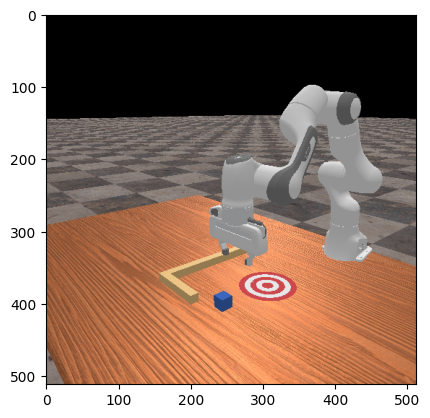

In [9]:
# PlugCharger-v1
# PegInsertionSide-v1
# TurnFaucet-v1

import matplotlib.pyplot as plt
import gymnasium as gym
import mani_skill.envs
env = gym.make("PullCubeWithHockeyStick-v1", render_mode="rgb_array")
env.reset()
plt.imshow(env.render()[0].cpu().numpy()) # we take [0].numpy() as everything is a batched tensor

In [ ]:
# PullCubeWithHockeyStick-v1
import sys
sys.path.append('/content/ManiSkill-Jan')


! rm -rf content/runs && rm -rf runs
import ppo_jan
# reload ppo_jan
import importlib
importlib.reload(ppo_jan)

ppo_jan.run(env_id = "PullCubeWithHockeyStick-v1",
    num_envs = 512 * 2,
    num_steps = 100,
    num_eval_steps = 100,
    eval_freq = 10,
    exp_name = "testing_testing",
    seed = 42,
    action_transformation = "clip",
    layer_init = "orthogonal",
    seperate_MLPs = True,
    total_timesteps = 10000000 # default nr timesteamps
    # total_timesteps = 3000000
    )

Running training
Saving eval videos to runs/testing_testing/videos
####
num_iterations=97 num_envs=1024 num_eval_envs=8
minibatch_size=3200 batch_size=102400 update_epochs=4
####
Epoch: 1, global_step=0
Evaluating
Evaluated 102400 steps resulting in 8 episodes
eval_success_rate=0.0
eval_episodic_return=1.7280288934707642
model saved to runs/testing_testing/ckpt_1.pt
SPS: 10534
Epoch: 2, global_step=102400


In [7]:
# play video named 0.mp4
from IPython.display import Video
Video("runs/testing_testing/videos/0.mp4", embed=True, width=1024) # Watch a replay during training evaluation

NameError: name 'sys' is not defined